# Introduction to neural network classification with Tensorflow

In this notebook we're going to learn how to write neural networks for classificarion problems.

A few Classification problems
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [45]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
     

In [46]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [47]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand right now soo let's visualize it!

In [48]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


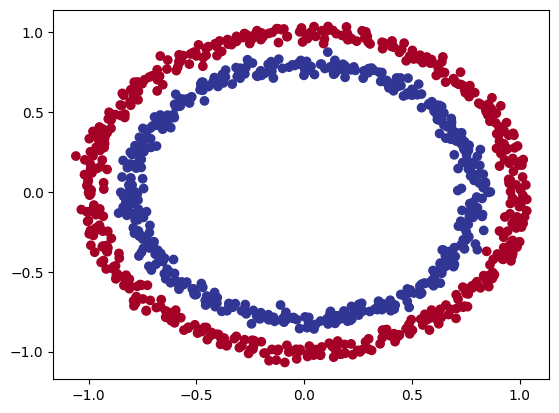

In [49]:
# Visualize with a plot 
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

## Input and Output Shapes

In [50]:
# Check the shape of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [51]:
# How many samples we're working
len(X),len(y)

(1000, 1000)

In [52]:
# view the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with TensorFlow are typically:

1. Create or import the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [53]:
import tensorflow as tf

In [54]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.4959 - loss: 7.0171  
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.4936 - loss: 0.2157
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.4988 - loss: 0.1802
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.4952 - loss: 0.1747
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.5002 - loss: 0.1739


In [55]:
# let's try and improve our model by trainig for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.4856 - loss: 0.1732


[0.1733737587928772, 0.47200000286102295]

Since we're working on a binary classification problem and our model is getting around ~48% accuracy its performing as if it's guessing 

So let's step thing sup a notch and add an extra layer

In [56]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model this time with 2 layers 
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])  

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X,y,epochs=200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.4606 - loss: 5.5038 
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [57]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.5045 - loss: 7.9045


[8.064604759216309, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model-we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization funtion such as Adam instead of SGD.
3. Fitting the model - perhaps we might fit our model for more epochs(leave it for training for some time)

In [58]:
# Setting up the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

# 3. Fiting the model
model_3.fit(X,y,epochs=200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.4449 - loss: 4.1551
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4724 - loss: 0.7341 
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.4753 - loss: 0.6998
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4501 - loss: 0.6973 
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4560 - loss: 0.6995 
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.4588 - loss: 0.6999
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.4542 - loss: 0.7006
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.4518 - loss: 0.7011
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.4528 - loss: 0.7016
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.4530 - loss: 0.7021
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.4495 - loss: 0.7024
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8

In [59]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.4943 - loss: 0.6921


[0.6940174102783203, 0.47699999809265137]

In [60]:
model_3.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

In [61]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_4 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_4.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.4674 - loss: 3.7411 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.4772 - loss: 0.7369
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.5028 - loss: 0.6947
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.4599 - loss: 0.6996
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.4497 - loss: 0.6994
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.4548 - loss: 0.7004
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.4546 - loss: 0.7011
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.4568 - loss: 0.7018
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4494 - loss: 0.7023 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.4477 - loss: 0.7028
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.4431 - loss: 0.7033
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

In [62]:
model_4.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.5047 - loss: 0.6917


[0.6951119899749756, 0.4880000054836273]

In [63]:
model_4.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

In [64]:
model_3.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

To visulaoze our model's function let's create a function `plot_decision_boundary()` , this function will :
* Take in a trained model,features(X) and labels(Y)
* Create a meshgrid of the different X values
* Male predictions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique class fails)

In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def plot_decision_boundary(model, X, y):
    """Plots the decision boundary created by a model predicting on X"""
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack the 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")        
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
Doing binary classification


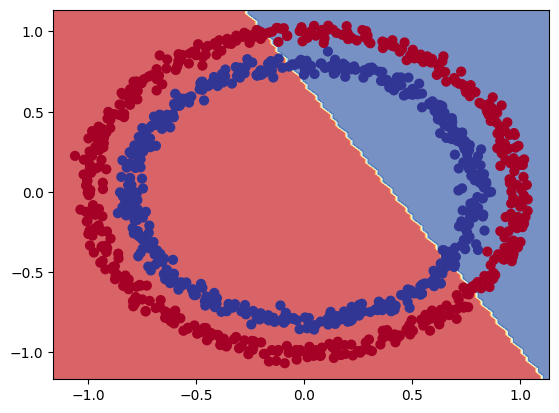

In [67]:
# Check out the predictions of our model is making
plot_decision_boundary(model=model_4,X=X,y=y)

In [68]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [70]:
# Fit our model to the regression data
model_4.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_11_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 2), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None,), dtype=int32)
  • training=True
  • mask=None

Oh wait we have compiled our model for a binary classification problem.

But we're now working on a regression problem let's change the model to suit our data

In [71]:
X_reg_train = tf.reshape(X_reg_train, (-1, 1))
Y_reg_train = tf.reshape(y_reg_train, (-1, 1))
X_reg_test = tf.reshape(X_reg_test, (-1, 1))
Y_reg_test = tf.reshape(y_reg_test, (-1, 1))



In [72]:
tf.random.set_seed(42)

# 1. Creating our model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),  
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2.Compile our model this time with a regression specific loss function
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_5.fit(X_reg_train,y_reg_train,epochs=100)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 392.2321 - mae: 393.2602  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 258.6050 - mae: 259.7472 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 122.2179 - mae: 123.4483
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.5786 - mae: 53.0238 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 86.7337 - mae: 86.7494 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 64.1607 - mae: 64.4080 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43.8820 - mae: 43.7402 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49.1353 - mae: 49.2513 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42.0668 - mae: 41.9853 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43.8717 - mae: 43.8929 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40.4412 - mae: 40.4574 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40.6289 - mae: 40.6316 
Epoch 13/100
5/5

In [73]:
print(f"X_reg_train shape: {X_reg_train.shape}")


X_reg_train shape: (150, 1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
X_reg_test shape: (50, 1)
Y_reg_test shape: (50,)
Y_reg_preds shape: (50,)


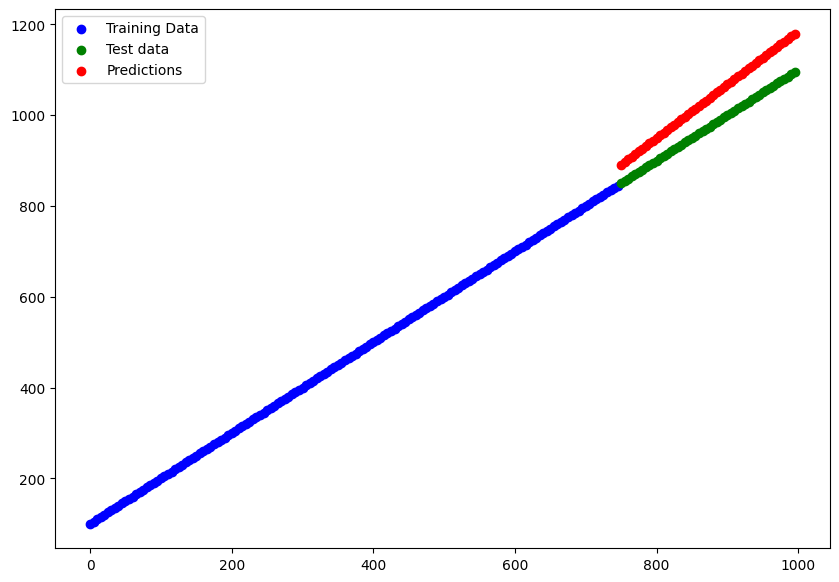

In [74]:
# Fix the length of Y_reg_test to match X_reg_test
Y_reg_test = Y_reg_test[:50]

# Make predictions with our trained model
Y_reg_preds = model_5.predict(X_reg_test)

# Ensure Y_reg_preds has the correct shape
Y_reg_preds = Y_reg_preds.flatten()

# Check shapes for confirmation
print(f"X_reg_test shape: {X_reg_test.shape}")
print(f"Y_reg_test shape: {y_reg_test.shape}")
print(f"Y_reg_preds shape: {Y_reg_preds.shape}")

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, Y_reg_preds, c="r", label="Predictions")
plt.legend()
plt.show()


### The Missing Piece: Non-linearity

In [75]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="linear")
])

# 2. Compiling the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history=model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.5105 - loss: 5.9238 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.5099 - loss: 5.8956
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.5099 - loss: 5.8878
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.5099 - loss: 5.8955
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.5099 - loss: 5.8786
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.5099 - loss: 5.8771
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.5095 - loss: 5.8518
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.5047 - loss: 5.8155
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.5031 - loss: 5.8180
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.4993 - loss: 5.7882
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.4997 - loss: 5.7724
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

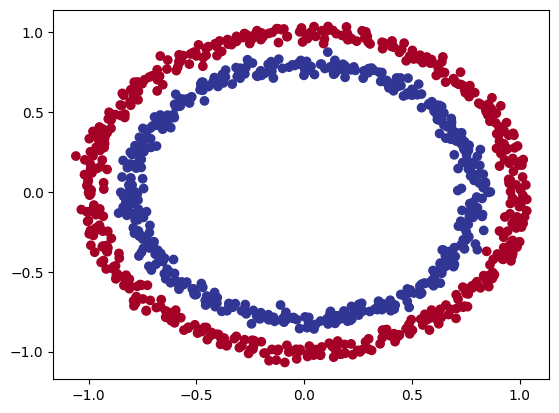

In [76]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
Doing binary classification


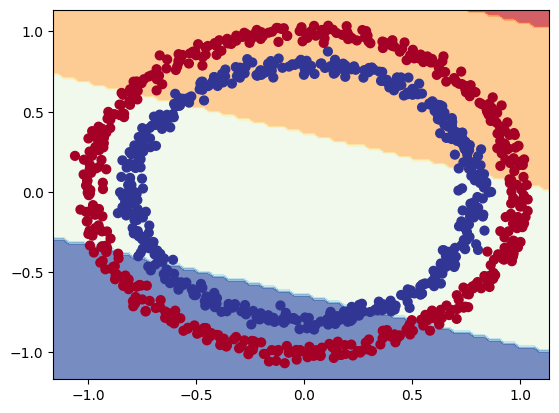

In [77]:
# Check the decision boundaryfor our latest model
plot_decision_boundary(model=model_6,X=X,y=y)

Let's try to build our first neural network with a non-linear activation function

In [78]:
# Set the random set
tf.random.set_seed(42)

# 1. Create the Model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu"),
    tf.keras.layers.dense(1)
    ])

# 2.Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                metrics=['accuracy'])

#3. Fitting the model
model_7.fit(X,y,epochs=100)

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'dense'

In [79]:
plot_decision_boundary(model=model_7,X=X,y=y)

NameError: name 'model_7' is not defined

In [80]:
# Time to replicate the mutli-layer neural network from Tensorflow Playground

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fitting the model
history=model_8.fit(X,y,epochs=250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [81]:
# Evaluate the model
model_8.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.4955 - loss: 8.1264


[7.96460485458374, 0.5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
Doing binary classification


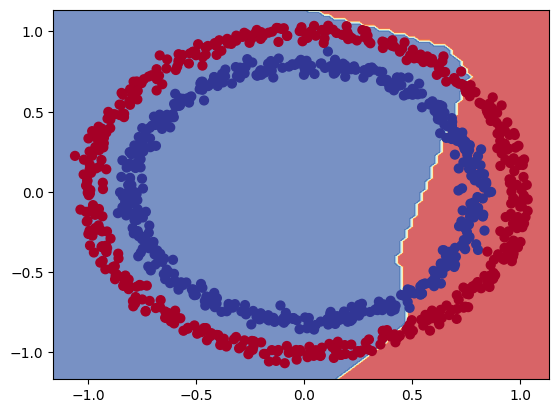

In [82]:
# How do our model predictions look
plot_decision_boundary(model_8,X,y)

In [83]:
#  Set the random seed
tf.random.set_seed(42)

# 1 Create the model
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2.Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                metrics=['accuracy'])

# 3.Fit the model
history=model_9.fit(X,y,epochs=300)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.5076 - loss: 0.6891 
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.5253 - loss: 0.6876
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.5324 - loss: 0.6867
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.5388 - loss: 0.6860
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.5444 - loss: 0.6853
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.5441 - loss: 0.6847
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.5528 - loss: 0.6840
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.5529 - loss: 0.6834
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.5529 - loss: 0.6827
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.5529 - loss: 0.6821
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.5529 - loss: 0.6814
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [84]:
# Evaluate the model
model_9.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.9178 - loss: 0.2320


[0.21800732612609863, 0.9319999814033508]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step
Doing binary classification


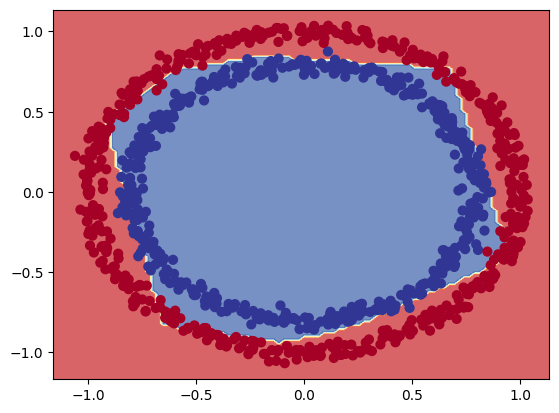

In [85]:
# let's visualize our incredible metrics
plot_decision_boundary(model_9,X,y)

**NOTE** : 
* The thing we are doing here is wrong because we are training the model on the same data that we are testing and evaluating on this might lead to over or under fitting the future

* The combination of linear and non linear functions is one of the key fundamentals of the neural networks

In [86]:
# Create a toy tensor (similar to the data that we pass into our models)
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

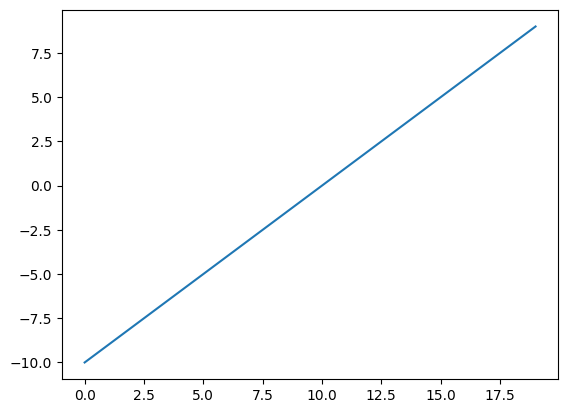

In [87]:
# Visualize our toy tensor
plt.plot(A)

In [88]:
# Let's start by replecating sigmoid-sigmoid(x)=1/(1+exp(-x))
def sigmoid(x):
    return 1/(1+tf.exp(-x))

# use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

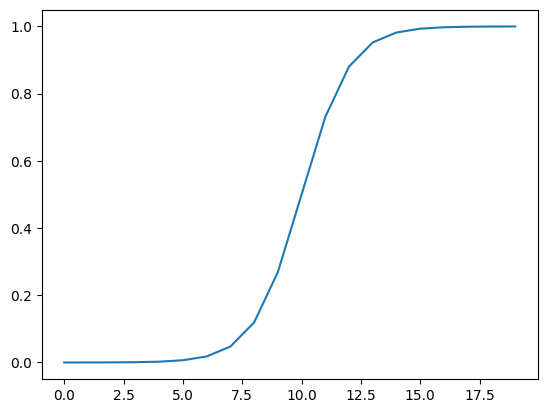

In [89]:
# Now plot the sigmoid function
plt.plot(sigmoid(A))

In [90]:
def relu(x):
    return tf.maximum(0,x)

# Now lets pass our toy tensor to our custom relu fucntion
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

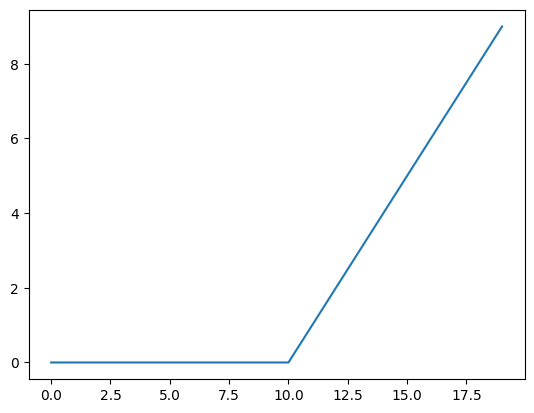

In [91]:
# Let's plot the relu values of the toy tensor
plt.plot(relu(A))

In [92]:
# Let's try the linear activation fucntion
def linear(x):
    return x

# Now lets pass our toy tensor into our custom linear activation function
linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

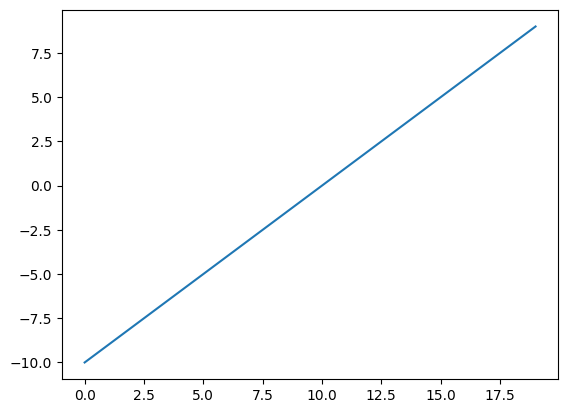

In [93]:
# Does the linear activation fucntion does anything
plt.plot(tf.keras.activations.linear(A))

### Evaluating and improving our classification

So far we've been training and testing on the same dataset 
.However,in machine learning this is a sin.
So let's create a training and test dataset

In [94]:
# Check how many examples we have
len(X)

1000

In [95]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [96]:
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [97]:
# Let's recreate a model to fit on the trianing data and evaluate on the testing data

#Set the random seed
tf.random.set_seed(42)


# 1.Create the model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["accuracy"])

# 3. Fit the model
history=model_10.fit(X_train,y_train,epochs=200)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.4875 - loss: 0.6954 
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.5095 - loss: 0.6934
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.5166 - loss: 0.6932
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.5151 - loss: 0.6932
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.5302 - loss: 0.6928
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.5760 - loss: 0.6903
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.6462 - loss: 0.6834
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.6378 - loss: 0.6765
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.7203 - loss: 0.6640
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.7664 - loss: 0.6437
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.7501 - loss: 0.6175
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 

In [98]:
model_10.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9737 - loss: 0.0752


[0.062249720096588135, 0.9750000238418579]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
Doing binary classification


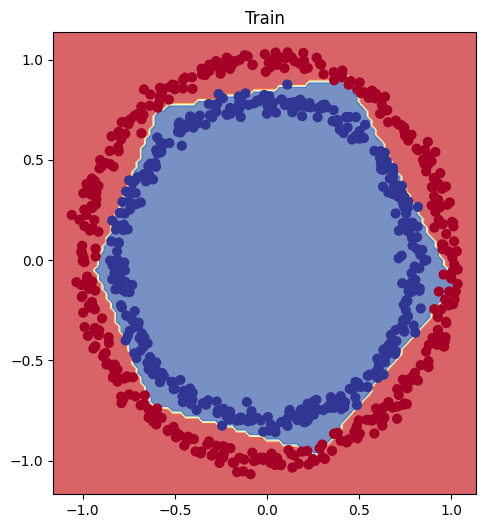

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
Doing binary classification


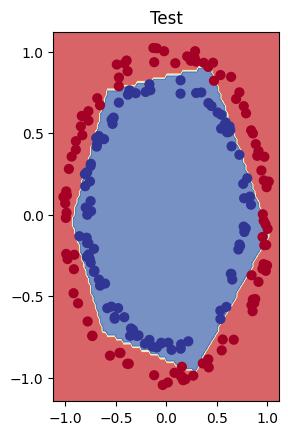

In [99]:
# Plot the descision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show()

### Plotting the loss curves

In [100]:
# Convert the history object into a dataFrame
pd.DataFrame(history.history)

,accuracy,loss
0,0.48375,0.695763
1,0.51250,0.693230
2,0.53625,0.692638
3,0.53500,0.692455
4,0.55875,0.691584
...,...,...
195,0.97500,0.066675
196,0.97500,0.066639
197,0.97500,0.066603
198,0.97500,0.066568


Text(0.5, 1.0, 'Model 10 loss curve')

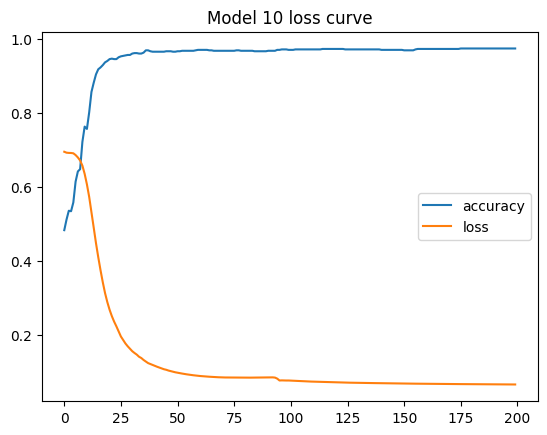

In [101]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model 10 loss curve")

**NOTE:** For many problems,the loss function going down means the model is improving(the predictions it's makiing are getting ground truth labels).

### Finding the best learning rate
TO find the ideal learning rate (the learning rate where the loss decreases the most in the training)we're gping to use the following steps:
* A learing rate **callback** - you can think of a callback as an extra piece of funtionality , you can add to your *while* its tarining.
* Another model(we could use the same one as above,but we're practicing building models here)
* A modified loss curves plot. 

In [102]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_11.compile(loss="binary_crossentropy",
                 optimizer="Adam",
                 metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

# Fit the model
history_11=model_11.fit(X_train,y_train,epochs=150,callbacks=[lr_scheduler])

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.4878 - loss: 0.6982 - learning_rate: 1.0000e-04
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.4888 - loss: 0.6981 - learning_rate: 1.1220e-04
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.4888 - loss: 0.6979 - learning_rate: 1.2589e-04
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.4886 - loss: 0.6978 - learning_rate: 1.4125e-04
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.4888 - loss: 0.6976 - learning_rate: 1.5849e-04
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.4900 - loss: 0.6975 - learning_rate: 1.7783e-04
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.4876 - loss: 0.6973 - learning_rate: 1.9953e-04
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.4868 - loss: 0.6971 - learning_rate: 2.2387e-04
Epoch 9/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.4816 - loss: 

<Axes: xlabel='epochs'>

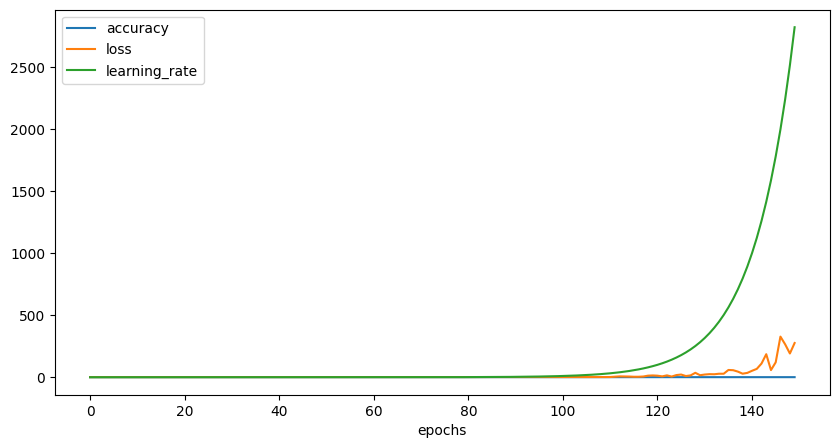

In [103]:
#Checkout the history
pd.DataFrame(history_11.history).plot(figsize=(10,5),xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate VS Loss')

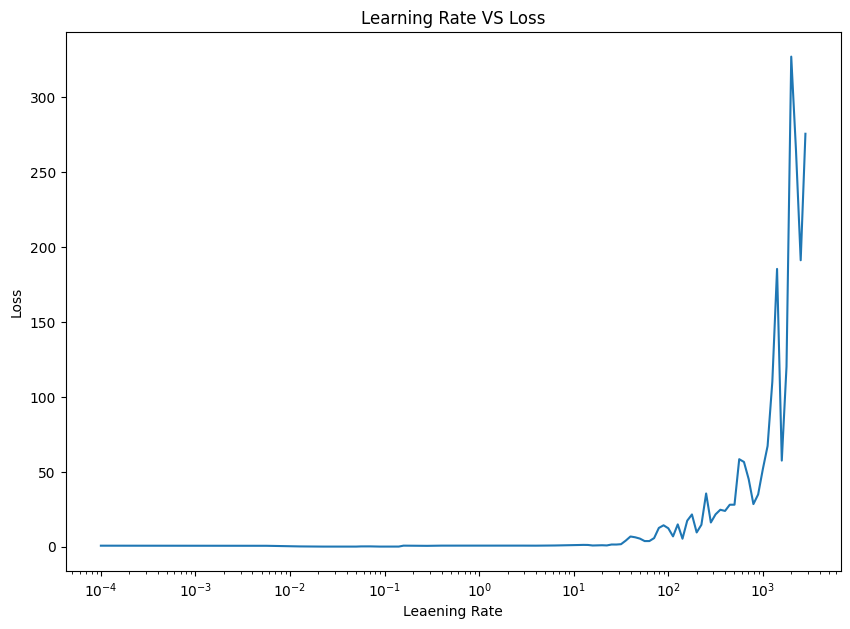

In [104]:
# Plot the learning rate vs the loss
lrs=1e-4*(10**(tf.range(150)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_11.history["loss"])
plt.xlabel("Leaening Rate")
plt.ylabel("Loss")
plt.title("Learning Rate VS Loss")

In [105]:
lrs

<tf.Tensor: shape=(150,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [106]:
len(lrs)

150

In [107]:
# let's try using a higher *idela* learning rate with the saem model

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_12=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

# Compile the model
model_12.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_12=model_12.fit(X_train,y_train,epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.5107 - loss: 0.6915 
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.5715 - loss: 0.6786
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.5961 - loss: 0.6560
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.7379 - loss: 0.6012
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.9109 - loss: 0.4939
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.9639 - loss: 0.3423
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.9817 - loss: 0.2286
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.9946 - loss: 0.1553
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.9953 - loss: 0.1190
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.9966 - loss: 0.0972
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.9891 - loss: 0.0823
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/ste

<Axes: >

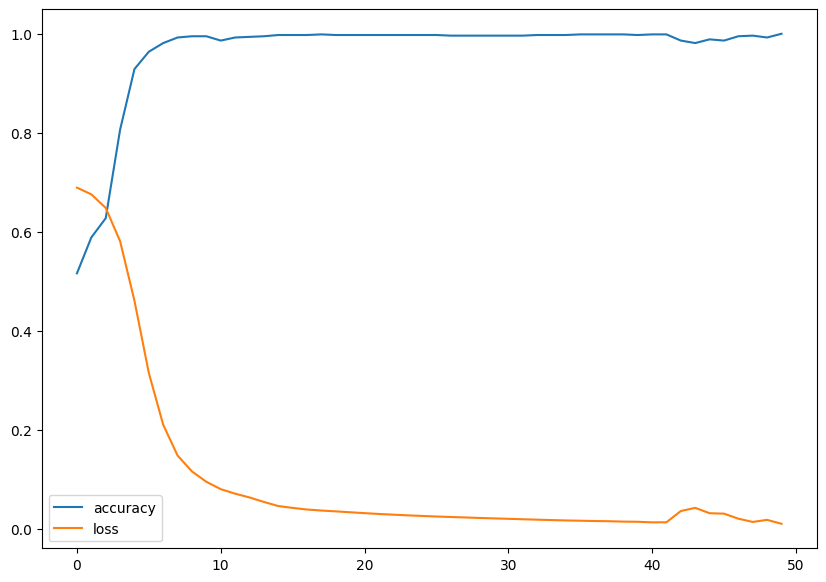

In [108]:
pd.DataFrame(history_12.history).plot(figsize=(10,7))

In [109]:
# Evaluate the model 12 on test data set
model_12.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9823 - loss: 0.0478 


[0.03320186585187912, 0.9850000143051147]

In [110]:
# Evaluate the model 10 on the test data set
model_10.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9737 - loss: 0.0752 


[0.062249720096588135, 0.9750000238418579]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
Doing binary classification


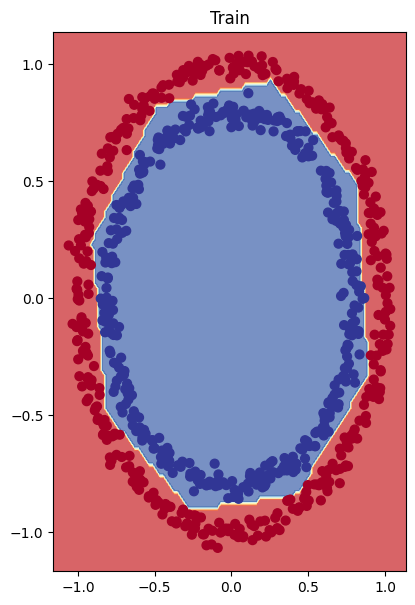

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
Doing binary classification


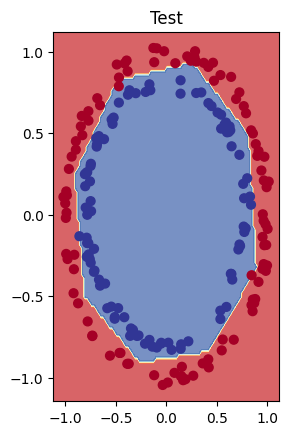

In [111]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_12,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_12,X=X_test,y=y_test)
plt.show()

## More Classifiation evaluation methods

* Along soide visualizing our models results as much as possible,there are a handful of other classification evaultion methods and metrics you should be familiar with
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification Report from Scikit Learn

In [112]:
# Check the accuracy of our model
loss,accuracy=model_12.evaluate(X_test,y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set:{(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.9823 - loss: 0.0478
Model loss on the test set:0.03320186585187912
Model accuracy on the test set:98.50%


How about a Confusion Matrix

In [115]:
# Create a Confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds=model_12.predict(X_test)

# Create confusion matrix


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step


In [116]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [117]:
y_preds[:10]

array([[9.9612361e-01],
       [9.9612361e-01],
       [9.9612361e-01],
       [9.9612361e-01],
       [2.7514566e-03],
       [1.6311657e-04],
       [9.9612361e-01],
       [2.2249631e-04],
       [9.9612361e-01],
       [2.2152804e-03]], dtype=float32)

Oopss.. looks like our predictions arry has come out in **prediction probability** form the standard output from the sigmoid (or soft max) activation function

In [120]:
# Convert our prediction probablities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [122]:
# Create the confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[99,  2],
       [ 1, 98]], dtype=int64)

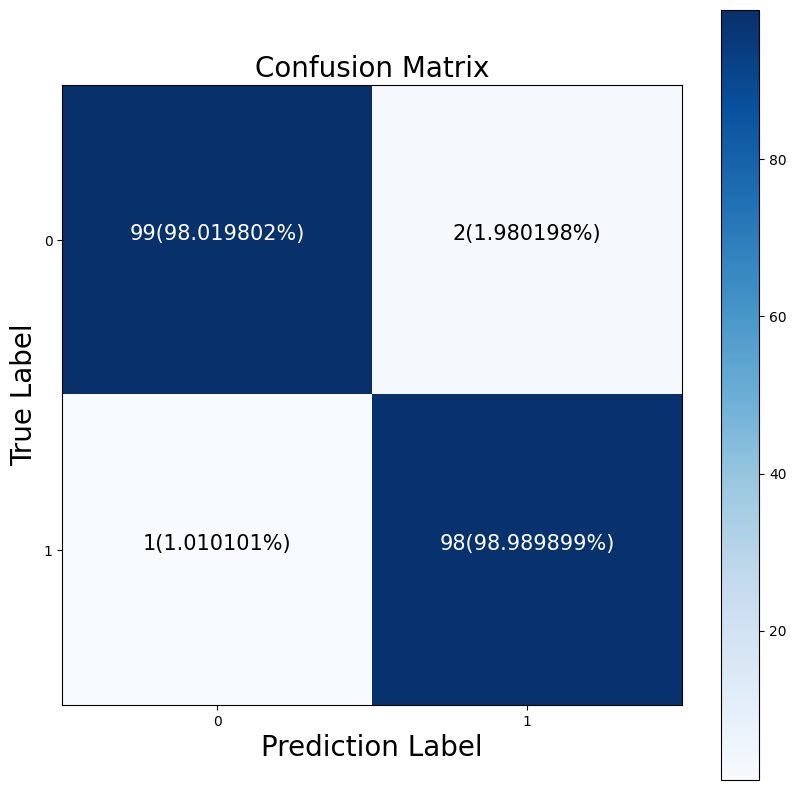

In [134]:
# Note: Confusion matrix we are about to write is a remix of scikit learn plot confusion matrix
import itertools

figsize=(10,10)

#Create the confusion matrix
cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # Normalize our matrix
n_class=cm.shape[0]

# Let's prettify it
fig,ax=plt.subplots(figsize=figsize)
# Create a matrix plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes=False

if classes:
    labels=classes
else:
    labels=np.arange(cm.shape[0])

#Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Prediction Label",
       ylabel="True Label",
       xticks=np.arange(n_class),
       yticks=np.arange(n_class),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis lables to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold for different colors
threshold=(cm.max()+ cm.mean())/2

# Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j]>threshold else "black", size=15)


## Working with a larger example(MultiClass Classification)

when you have more than two classes as an option.it's known as **mutli-class classification**
* This means if you have 3 different classes,it's multi-class classification 
* It also mean if you have 100 different classes,it's multi-class classification

To practise multi-class classification we are going to bulid a neural network to classify images of different items of clothing

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training ans test sets for us
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [4]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
# Check the shape of a single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

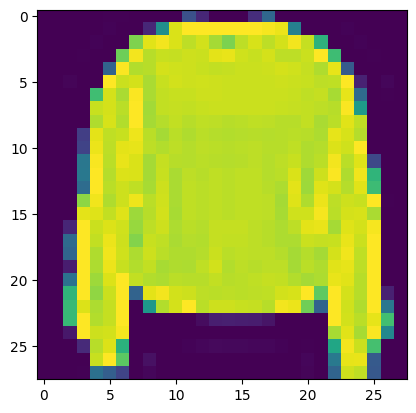

In [6]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [7]:
# Check the sample label
train_labels[7]

2

In [8]:
# Create a small list so we can index onto our training labels so they are human-readable
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

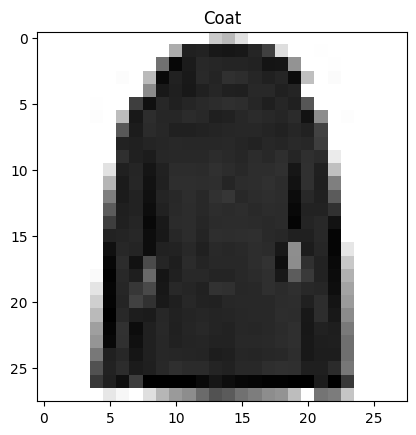

In [9]:
# Plot an example imgage and its label
index_of_choice=2000
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

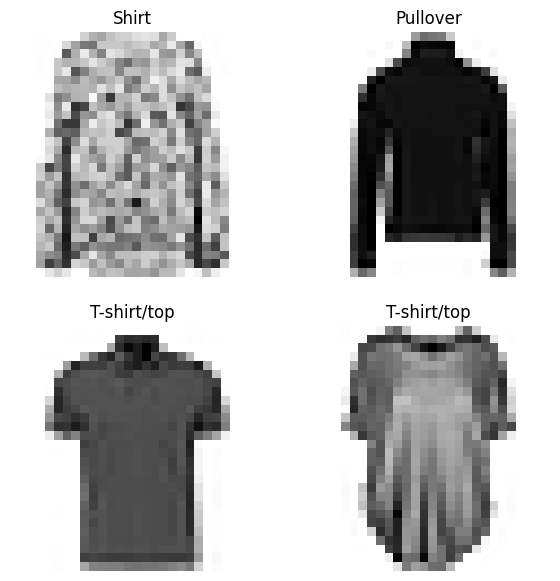

In [10]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax=plt.subplot(2,2,i+1)
    ran_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[ran_index],cmap=plt.cm.binary) # We areusing cmap inorder to plt images as grayscale
    plt.title(class_names[train_labels[ran_index]])
    plt.axis(False)

## Build a multi-class classification model

* For our multi-class classification model,we can use a similar archieture to our binary classifiers,however we are going to have to tweak a few things:
* Input shape - (28x28)(the shape of one image)
* Output shape - 10 (one per class of clothing)
* Loss function - tf.keras.losses.CategoricalCrossentorpy()
    * If your lables are **one-hot encoded** use CategoricalCrossentropy or else use SparseCatergoricalCrossentropy(for integer datatype)
* Output activation - Softmax (not sigmoid)

In [11]:
# Our data needs to flattened (from 28x28 to 784 because neural networks likes the input to be in one long vector or array)
flatten_model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [12]:
28*28

784

In [13]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [14]:
tf.one_hot(train_labels[:10],depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_mul=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compile the model
model_mul.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

# Fit the model
non_norm_history=model_mul.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 779us/step - accuracy: 0.0995 - loss: 2.8039 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.0983 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.0985 -

In [15]:
# Check the model Summary
model_mul.summary()
model_mul.evaluate(test_data,test_labels)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.0978 - loss: 2.3027


[2.302656412124634, 0.10000000149011612]

In [14]:
# Check the min and max of the training data
train_data.min(),train_data.max()

(0, 255)

Neural Networks prefer the data to be scaled(or nrormalized),this means they like to have the numbers in the tensors they try to find patterns between 0 and 1

In [15]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm=train_data/float(train_data.max())
test_data_norm=test_data/float(test_data.max())

# Check the min and max values of the scaled training data
train_data_norm.min(),train_data_norm.max()
test_data_norm.min(),test_data_norm.max()

(0.0, 1.0)

In [16]:
# Now our data is normalized,let's bulid a model to find patterns in it

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_mul_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compile the model
model_mul_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

# Fit the model
norm_history=model_mul_1.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1847 - accuracy: 0.5670 - val_loss: 0.8079 - val_accuracy: 0.6933
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7247 - accuracy: 0.7252 - val_loss: 0.6873 - val_accuracy: 0.7429
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6528 - accuracy: 0.7548 - val_loss: 0.6653 - val_accuracy: 0.7460
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6267 - accuracy: 0.7671 - val_loss: 0.6489 - val_accuracy: 0.7594
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6130 - accuracy: 0.7752 - val_loss: 0.6411 - val_accuracy: 0.7678
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6015 - accuracy: 0.7818 - val_loss: 0.6304 - val_accuracy: 0.7747
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5930 - accuracy: 0.7856 - val_loss: 0.6595 - val_accuracy:

In [17]:
# Check the model summary
model_mul_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


> **Note;** Neural network tend to prefer data in numerical form as well as scaled/normalized(numbers between 0 and 1)

In [16]:
import pandas as pd
# Plot non-normalised data losss curve
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized-data")

NameError: name 'non_norm_history' is not defined

In [17]:
# You can acces the information in the history variable using the .history attribute
pd.DataFrame(norm_history.history)

NameError: name 'norm_history' is not defined

> **Note:** The same model with even *slightly* differnet data can produce *dramatically* differnent results.So when you're comparing models,it's important to make sure you're comparing them on the same criteria(e.g. same architecture but different data or same data but differnt architecture)

## Finding the ideal learning rate

In [18]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_mul_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])


# Compile the model
model_mul_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler_mul=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

# Fit the model
lr_norm_hist=model_mul_2.fit(train_data_norm,
                train_labels,
                epochs=40,
                validation_data=(test_data_norm,test_labels),
                callbacks=lr_scheduler_mul
                )

Epoch 1/40
 868/1875 [============>.................] - ETA: 3s - loss: 1.8612 - accuracy: 0.2879

KeyboardInterrupt: 

In [19]:
import numpy as np

In [20]:
pd.DataFrame(lr_norm_hist.history)

NameError: name 'lr_norm_hist' is not defined

In [21]:
# Plot the learning rate deacy curve
lrs=1e-3*(10**(np.arange(40)/20))
plt.semilogx(lrs,lr_norm_hist.history["loss"])
plt.xlabel("Learnig Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

NameError: name 'lr_norm_hist' is not defined

In [22]:
pd.DataFrame({'learnig_rate':lrs,'loss':lr_norm_hist.history["loss"]})

NameError: name 'lr_norm_hist' is not defined

In [23]:
# Let's refit the model with the idela learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_mul_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compile the model
model_mul_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=["accuracy"]
)

# Fit the model
best_lr_hist=model_mul_3.fit(train_data_norm,
                train_labels,
                epochs=20,
                validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2207 - accuracy: 0.5738 - val_loss: 0.8259 - val_accuracy: 0.6985
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7519 - accuracy: 0.7250 - val_loss: 0.7126 - val_accuracy: 0.7392
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6749 - accuracy: 0.7554 - val_loss: 0.6654 - val_accuracy: 0.7569
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6449 - accuracy: 0.7667 - val_loss: 0.6508 - val_accuracy: 0.7637
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6117 - accuracy: 0.7831 - val_loss: 0.6179 - val_accuracy: 0.7869
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5714 - accuracy: 0.8027 - val_loss: 0.6067 - val_accuracy: 0.7892
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5563 - accuracy: 0.8089 - val_loss: 0.5810 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics(such as a confusion matrix)
* Asses some of its predictions(through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save ans export it use in an application


In [24]:
# Create the confusion matrix
# Note: Confusion matrix we are about to write is a remix of scikit learn plot confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

figsize=(10,10)

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

    # Create the confusion matrix
    cm=confusion_matrix(y_true,tf.round(y_pred))
    cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # Normalize our matrix
    n_class=cm.shape[0]

    # Let's prettify it
    fig,ax=plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax=ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels=classes
    else:
        labels=np.arange(cm.shape[0])

    #Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Prediction Label",
        ylabel="True Label",
        xticks=np.arange(n_class),
        yticks=np.arange(n_class),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis lables to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set the threshold for different colors
    threshold=(cm.max()+ cm.mean())/2

    # Plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j]>threshold else "black", size=text_size)


In [25]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [26]:
# Make some predictions with our model
y_probs=model_mul_3.predict(test_data_norm)
# probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[1.72824191e-08, 8.38726349e-15, 4.69778847e-08, 5.60377522e-08,
        2.29935962e-04, 1.77130066e-02, 1.69762905e-04, 3.76835525e-01,
        2.03305837e-02, 5.84721029e-01],
       [1.20327844e-04, 1.16349096e-04, 9.08164442e-01, 3.98746316e-08,
        4.68277223e-02, 0.00000000e+00, 4.47699614e-02, 2.02113182e-20,
        1.15804096e-06, 6.22786487e-32],
       [4.93115097e-11, 9.99944448e-01, 2.77331837e-05, 1.07007354e-05,
        1.70452786e-05, 4.33490703e-25, 9.42482647e-10, 3.43108869e-13,
        1.88269463e-15, 4.47575835e-27],
       [1.15649382e-11, 9.99965549e-01, 5.67971210e-06, 2.24803898e-05,
        6.17748765e-06, 5.87823553e-22, 1.48275461e-10, 6.68780179e-12,
        4.19140331e-16, 1.20907725e-25],
       [1.12969533e-01, 1.69534615e-04, 1.26211673e-01, 6.48329407e-03,
        4.62937318e-02, 1.09450358e-13, 6.98136389e-01, 6.74116976e-08,
        9.73575655e-03, 3.93228922e-11]], dtype=float32)

> **Note:** Remember to make predictions on the same kind of data your model is trained on(e.g. if your model is trained on normalised data,you'll want to make predictions on mormalised data).

In [27]:
test_data[10],test_data_norm[10]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145, 190,
          97, 109, 105, 187,  76,   0,   0,   0,   2,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 170, 163, 208,
         243, 240, 229, 173, 162, 154,  18,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  39, 158, 196, 149, 191, 199,
         223, 243, 186, 191, 170, 155, 162, 126,  22,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   3,   0, 105, 161, 150, 141, 130, 199, 239,
         229, 220, 188, 244, 145, 128, 142, 151, 175,  23,   0,   2,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0, 150, 137, 134, 130, 147, 121, 241,
         255, 114, 240, 173, 142, 136, 132, 128, 153, 113,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,  17, 157, 129, 146, 149, 137, 141, 177,
         200, 200, 207, 134, 145, 142, 140, 132, 129, 140,   3,   0,   0,
           0

In [28]:
y_probs[0],tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([1.7282419e-08, 8.3872635e-15, 4.6977885e-08, 5.6037752e-08,
        2.2993596e-04, 1.7713007e-02, 1.6976290e-04, 3.7683553e-01,
        2.0330584e-02, 5.8472103e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [29]:
# Convert all of the prediction probabilities into integers
y_preds=y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [30]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

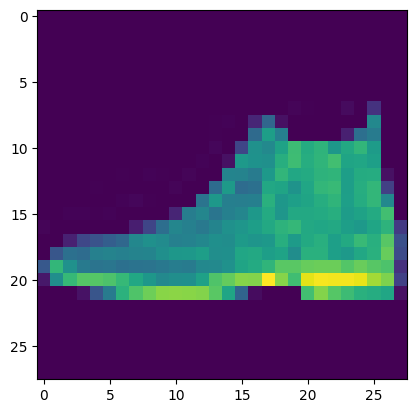

In [31]:
plt.imshow(test_data[0])

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[805,   2,  27,  82,   1,   0,  78,   0,   5,   0],
       [  1, 947,  13,  32,   3,   0,   4,   0,   0,   0],
       [ 24,   5, 693,  14, 152,   0, 112,   0,   0,   0],
       [ 54,  38,  29, 811,  30,   2,  35,   0,   1,   0],
       [  1,   4, 112,  30, 751,   0,  99,   1,   2,   0],
       [  0,   0,   0,  11,   0, 790,   3, 121,  19,  56],
       [200,   2, 118,  48, 116,   1, 505,   0,  10,   0],
       [  0,   0,   0,   0,   0,  11,   0, 965,   3,  21],
       [  6,   0,   3,   5,  15,   2,  58,   4, 906,   1],
       [  0,   0,   0,   1,   0,   8,   3,  71,  10, 907]], dtype=int64)

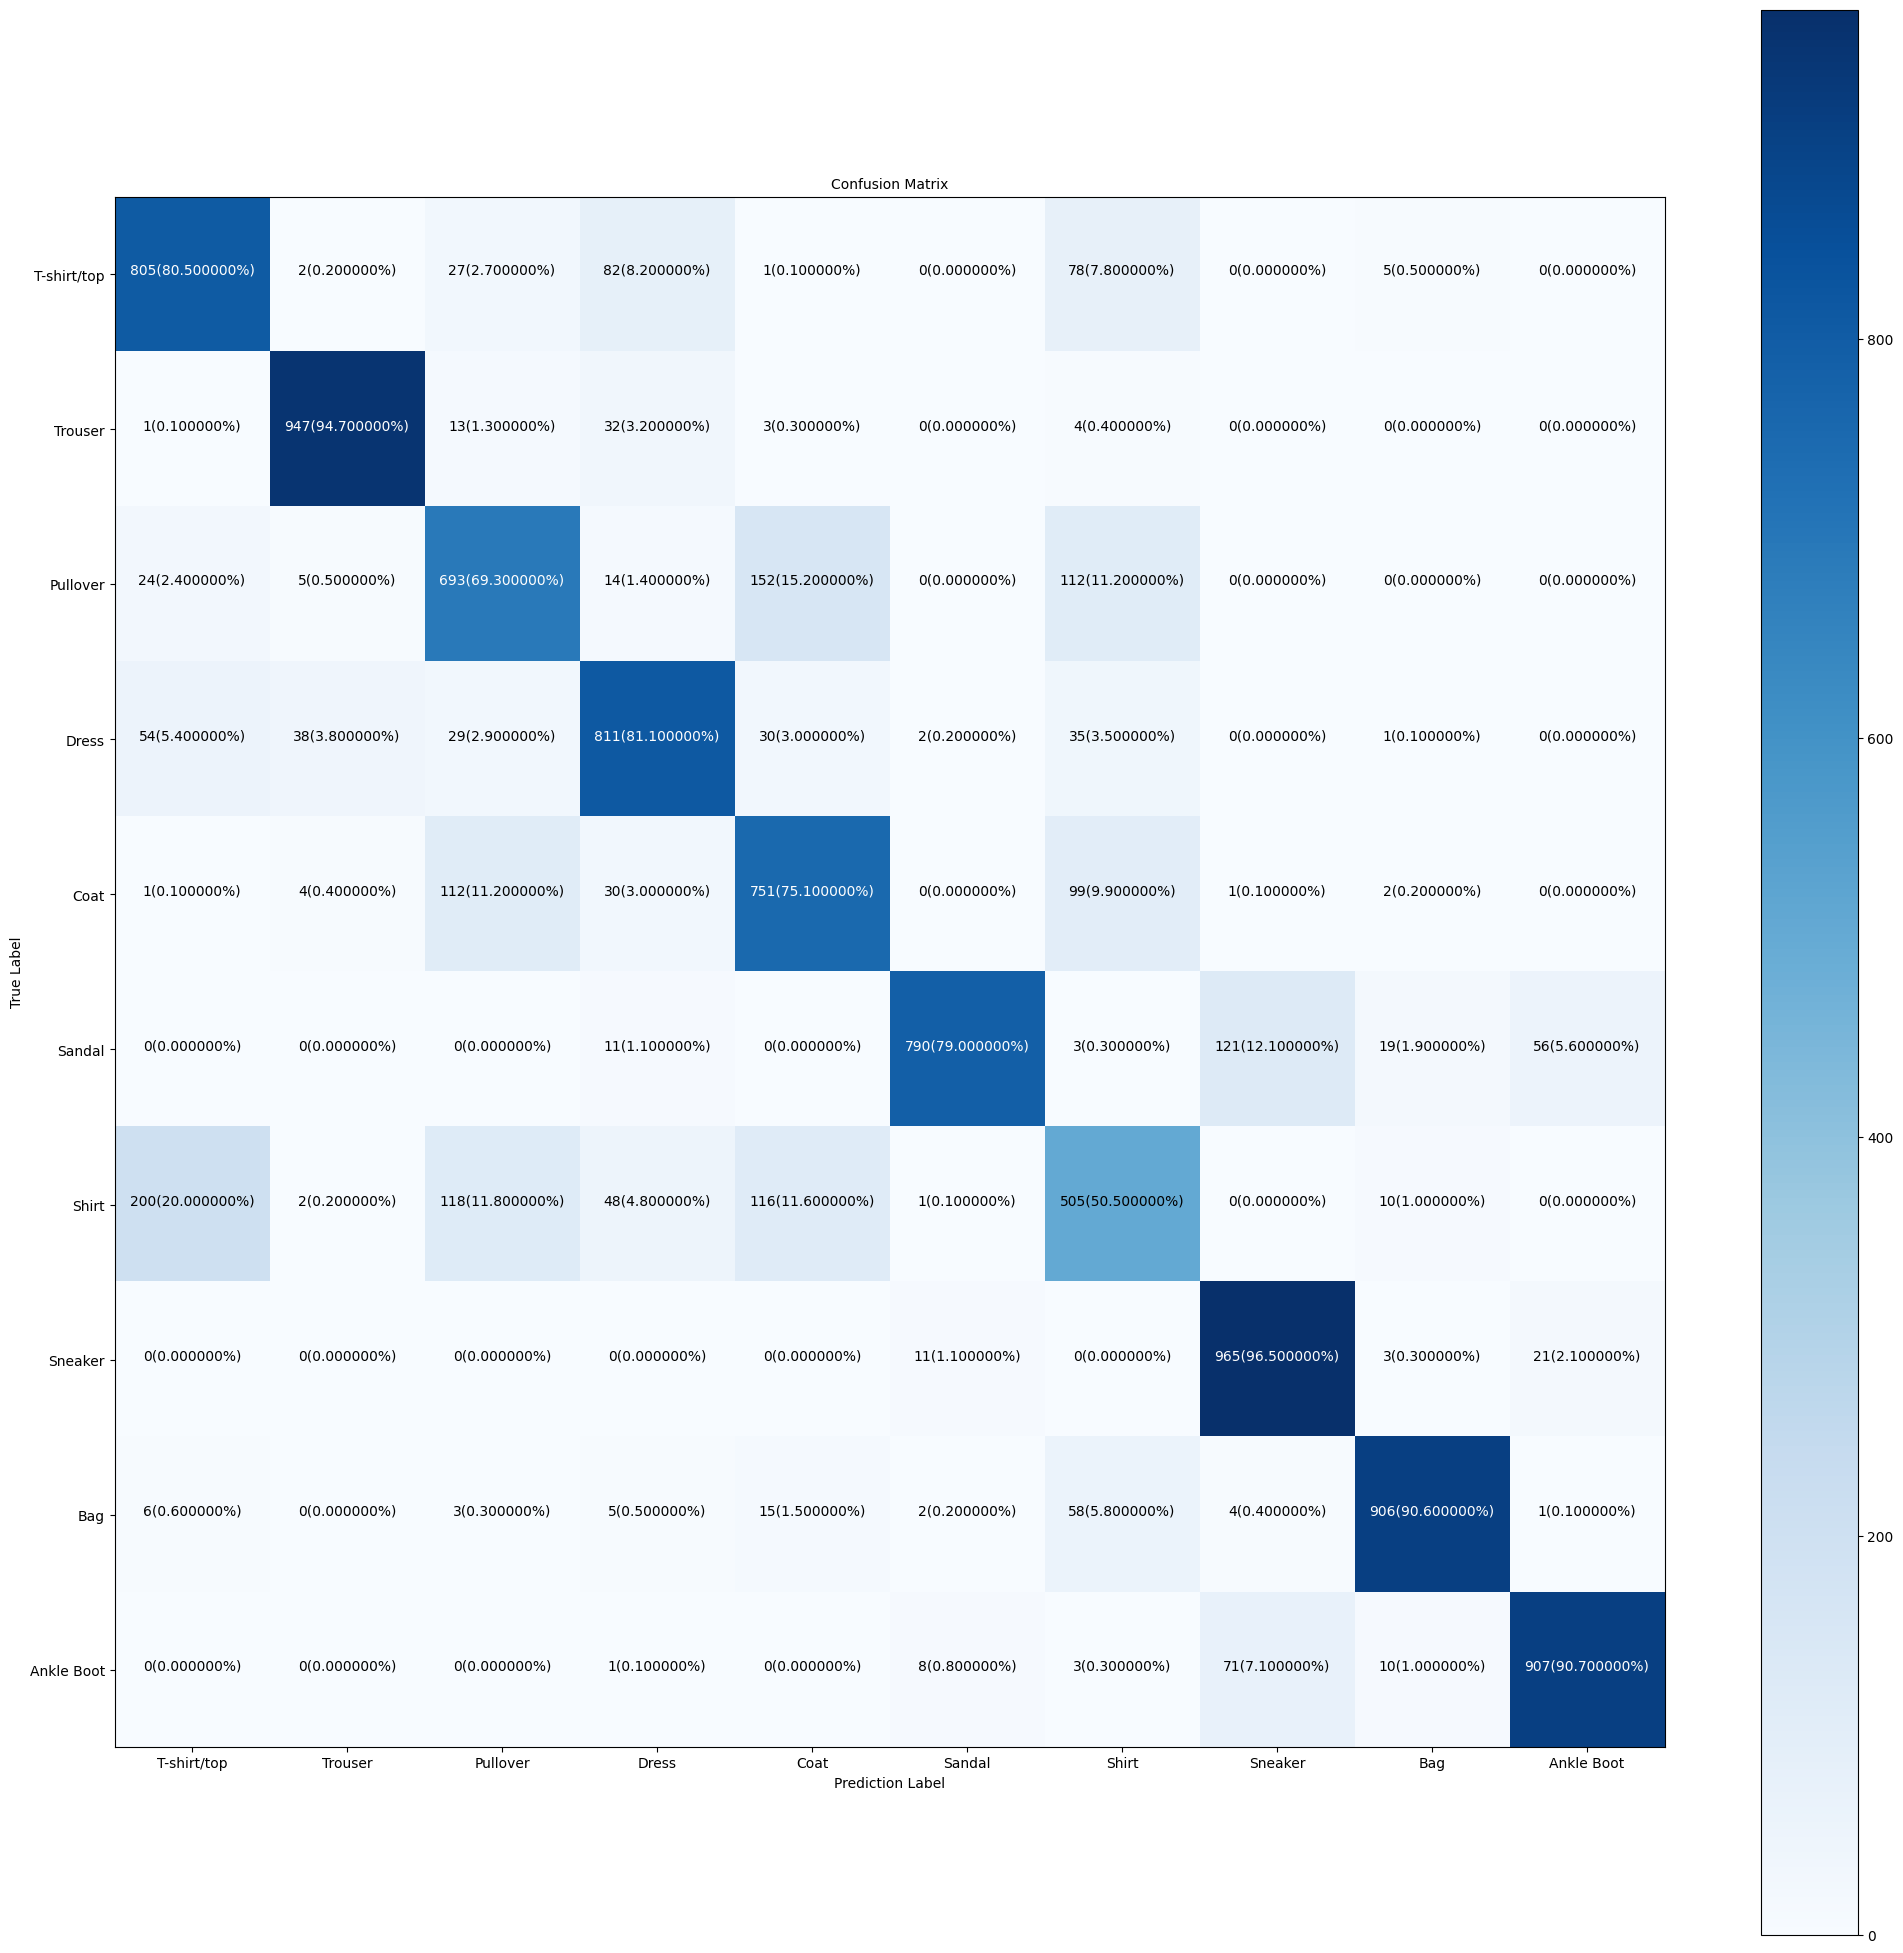

In [33]:
# Make a prettier confusion matric
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,classes=class_names,figsize=(25,25),text_size=10)

> **Note:** Often when working with images and other forms of visual data it's a good idea to visulaize as much as possible to develop a further understanding of the data and the inputs and outputs of your models

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with truth label and the predicted label

In [34]:
import random
def plot_random_image(model,images,true_labels,classes):
    """Picks a random image,plots it and labels it with a prediction and truth label"""
    # Set up a random integer
    i=random.randint(0,len(images))

    # Create predictions and targets
    target_image=images[i]
    pred_probs=model.predict(target_image.reshape(1,28,28))  # have to reshape to get into right size for model
    pred_label=classes[pred_probs.argmax()]
    true_label=classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image,cmap=plt.cm.binary)

    # Change the color of the title depending on if the prediction is right or wrong
    if(pred_label==true_label):
        color="green"
    else:
        color="red"

    # Add xlabel information (prediction/true labels)
    plt.xlabel("Pred:{} {:2.0f}% (True:{})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
                                                   color=color) # Sets the color based on the if the prediciton is right or wrong

1/1 [==============================] - 0s 21ms/step


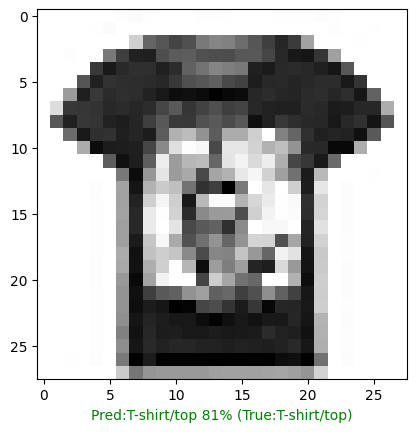

In [35]:
# Check out a random image as well as its prediction
plot_random_image(model=model_mul_3,
                  images=test_data_norm,# always make prediction on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning??

In [36]:
# Find the layers of most recent model
model_mul_3.layers

In [37]:
# Extract a particular layer
model_mul_3.layers[1]

In [38]:
# Get the patterns of alyer in our network
weights,biases=model_mul_3.layers[1].get_weights()

# Shapes
weights,weights.shape

(array([[-0.02897599,  0.7238149 , -0.3465865 ,  0.20358844],
        [-0.35680962,  0.04410689, -0.9768815 ,  1.1790979 ],
        [-0.4726782 , -0.67838985, -0.48436597,  0.39645365],
        ...,
        [-0.22977386, -0.11679902, -0.42574164,  0.46345717],
        [ 0.42301413,  0.03235722, -0.13121368,  0.89614975],
        [ 0.72315925, -0.6439458 ,  0.24000861,  0.5965504 ]],
       dtype=float32),
 (784, 4))

In [39]:
28*28

784

In [40]:
model_mul_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


> For each of the tensor after flattening it form 28x28 shape to 784 the there are 4 weights that are corresponds to each one of the hidden neuron in the first **Dense layer**

Now let's check out the bias vector...

In [41]:
# Bias and biases shapes
biases,biases.shape

(array([0.28259185, 1.5296655 , 0.6065931 , 1.3662326 ], dtype=float32), (4,))

Every neuron has bias vector. Each od thers is paired with a weights matrix.

The bias vector get initialized as zeros(at least in the case of a Tensorflow Dense Layer).

The bias vector dictates how much the patterns with in the corresponding weights matrix should influence the next layer

In [42]:
# This is how may weights,biases are present in each layer if the hidden layer contains 4 neurons
len(weights)*4,len(biases)

(3136, 4)

In [43]:
# weights if hidden layer contains 10 neurons
len(weights)*10,len(biases)

(7840, 4)

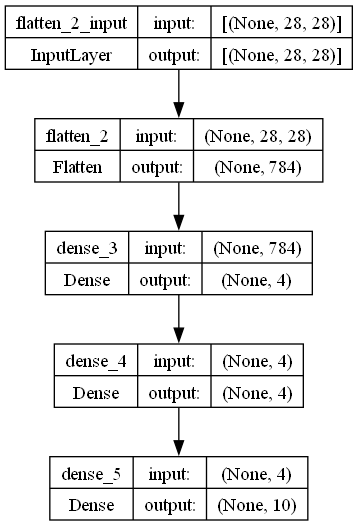

In [44]:
# Let's check out another way of viwing our  deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_mul_3,show_shapes=True)